## 1. Set Data For Training - Digits Dataset

- Dataset: Digits (8x8 handwritten digit images)
- Classes: 10 (digits 0-9)
- Original features: 64 (8x8 pixels)
- Reduced features: 4-14 (using PCA - tuned)
- Random seed: 42
- Scale: MinMaxScaler [0, 1]
- **Total samples: 500 (subset from original 1797)**
- **Data Split: 300 Train (60%) / 100 Validation (20%) / 100 Test (20%)**
- **Step-by-step hyperparameter tuning using validation set**
- SVM Pipeline with preprocessing and systematic parameter optimization

In [31]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


# Load digits dataset (8x8 handwritten digit images)
digits = datasets.load_digits()
X = digits.data
y = digits.target
print(f"Original dataset shape: {X.shape}")
print(f"Original number of samples: {X.shape[0]}")

# Limit to 300 samples for training
# First, get a subset of 500 samples (to have enough for train/val/test)
X_subset, _, y_subset, _ = train_test_split(
    X, y, train_size=500, random_state=42, stratify=y
)

print(f"\nSubset dataset shape: {X_subset.shape}")
print(f"Number of samples: {X_subset.shape[0]}")
print(f"Number of features: {X_subset.shape[1]}")
print(f"Number of classes: {len(np.unique(y_subset))}")
print(f"Classes: {np.unique(y_subset)}")

# Show sample distribution
print("\nClass distribution in subset:")
unique, counts = np.unique(y_subset, return_counts=True)
for i, count in zip(unique, counts):
    print(f"Class {i}: {count} samples")
	
# Split data into train/validation/test sets
# First split: 300 train (60%), 200 temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_subset, y_subset, train_size=300, random_state=42, stratify=y_subset
)

# Second split: 100 validation, 100 test (from the 200 temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nFinal split (300 train, 100 val, 100 test):")
print(f"Training samples: {len(y_train)}")
print(f"Validation samples: {len(y_val)}")
print(f"Test samples: {len(y_test)}")

# Normalize features to [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# PCA for dimensionality reduction (from 64 to 8 dimensions)
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")


print(f"\nData splits:")
print(f"Training set: {X_train_pca.shape} (300 samples, 60%)")
print(f"Validation set: {X_val_pca.shape} (100 samples, 20%)")
print(f"Test set: {X_test_pca.shape} (100 samples, 20%)")

Original dataset shape: (1797, 64)
Original number of samples: 1797

Subset dataset shape: (500, 64)
Number of samples: 500
Number of features: 64
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]

Class distribution in subset:
Class 0: 50 samples
Class 1: 51 samples
Class 2: 49 samples
Class 3: 51 samples
Class 4: 50 samples
Class 5: 51 samples
Class 6: 50 samples
Class 7: 50 samples
Class 8: 48 samples
Class 9: 50 samples

Final split (300 train, 100 val, 100 test):
Training samples: 300
Validation samples: 100
Test samples: 100
Applying PCA for dimensionality reduction...
Explained variance ratio: [0.15063153 0.13698489 0.1180236  0.08396924 0.05764594 0.04857078
 0.04291932 0.03721594]
Total explained variance: 0.6760

Data splits:
Training set: (300, 8) (300 samples, 60%)
Validation set: (100, 8) (100 samples, 20%)
Test set: (100, 8) (100 samples, 20%)


In [32]:
# Save processed data
np.savez_compressed(
	"../data/digits_8features_01_data.npz",
	X_train=X_train_pca,
	X_val=X_val_pca,
	X_test=X_test_pca,
	y_train=y_train,
	y_val=y_val,
	y_test=y_test
)

In [33]:
data = np.load("../data/digits_8features_01_data.npz")

X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

In [34]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))

In [35]:
from sklearn.metrics.pairwise import rbf_kernel
from src.utils import calculate_accuracy

rbf_K_train = rbf_kernel(X_train)
rbf_K_val = rbf_kernel(X_val, X_train)
rbf_K_test = rbf_kernel(X_test, X_train)

classical_val_acc, classical_test_acc, _ = calculate_accuracy(
    rbf_K_train, rbf_K_val, rbf_K_test,
    y_train, y_val, y_test
)
print("Val acc | Test acc")
print(f"{classical_val_acc} | {classical_test_acc}")

Val acc | Test acc
0.94 | 0.95


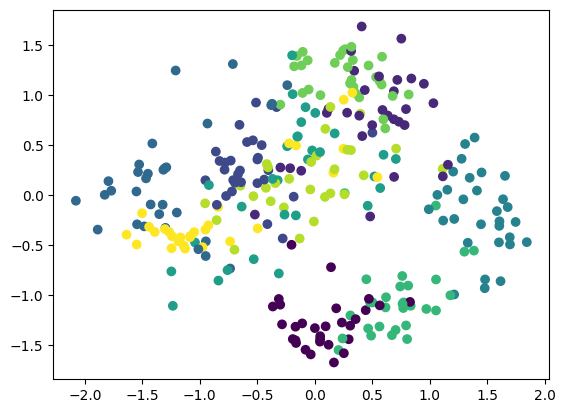

In [36]:
from matplotlib import pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()